# Problem Set 5

See [Introduction](https://datascience.quantecon.org/../pandas/intro.html) and [Basic Functionality](https://datascience.quantecon.org/../pandas/basics.html)

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline

## Setup

These questions use data on daily Covid cases in health regions in Canada from the [COVID-19 Canada Open Data Working Group](https://github.com/ccodwg/Covid19Canada).

In [2]:
url = "https://github.com/ccodwg/Covid19Canada/raw/master/timeseries_hr/cases_timeseries_hr.csv"
try : # only download if cases_raw has not already been defined 
    cases_raw
except:
    cases_raw = pd.read_csv(url, parse_dates=["date_report"])

try :
    hr_map 
except: 
    hr_map = pd.read_csv("https://github.com/ccodwg/Covid19Canada/raw/master/other/hr_map.csv")

C:\Users\chunq\AppData\Local\Temp\ipykernel_9732\3391791791.py:5: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  cases_raw = pd.read_csv(url, parse_dates=["date_report"])


Now, we create cases per 100,000 and then do the same manipulation as in the pandas basics lecture. We will focus on BC health regions in this problem set.

In [3]:
cases_raw

,province,health_region,date_report,cases,cumulative_cases
0,Alberta,Calgary,2020-01-25,0,0
1,Alberta,Calgary,2020-01-26,0,0
2,Alberta,Calgary,2020-01-27,0,0
3,Alberta,Calgary,2020-01-28,0,0
4,Alberta,Calgary,2020-01-29,0,0
...,...,...,...,...,...
84655,Yukon,Yukon,2022-04-29,9,4196
84656,Yukon,Yukon,2022-04-30,0,4196
84657,Yukon,Yukon,2022-01-05,0,4196
84658,Yukon,Yukon,2022-02-05,21,4217


In [4]:
cases_bc = cases_raw.loc[(cases_raw['province'] == 'BC') &  
                         (cases_raw['date_report'] < pd.to_datetime('2022-01-01')) &
                         (cases_raw['date_report'] >= pd.to_datetime('2021-01-01')),:] # Take the data for BC in year 2021 only
# create cases per 100,000
cases_bc = cases_bc.merge(hr_map[['province','health_region','pop']],
                          on=['province','health_region'],
                          how='left')
cases_bc['cases100k'] = cases_bc['cases'] / cases_bc['pop'] * 100_000
cases_bc = ( 
    cases_bc.reset_index()
    .pivot_table(index='date_report',columns='health_region', values='cases100k')
)    
cases_bc

health_region,Fraser,Interior,Island,Northern,Vancouver Coastal
date_report,,,,,
2021-01-01,0.000000,0.000000,0.000000,0.000000,0.000000
2021-01-02,25.701861,24.589675,9.101332,33.213897,24.191511
2021-01-03,45.464436,9.935222,10.519722,39.252788,26.815675
2021-01-04,21.129137,7.203036,6.500952,17.110190,21.813363
2021-01-05,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...
2021-12-27,42.153154,36.387752,24.585417,17.781177,28.865804
2021-12-28,41.995474,33.282995,33.686749,13.755250,32.966060
2021-12-29,83.623027,46.447164,36.523528,33.213897,46.824926


The resulting `cases_bc` DataFrame contains Covid cases per 100,000 population for each BC health region and day, in 2021.

## Question 1

Transform the `cases` and `cases100k` columns by taking their absolute value. At each date, what is the minimum number of cases per 100,000 across health regions?

In [5]:
# Your code here
# Takes absolute value of cases_bc
absolute_cases_bc = cases_bc.abs()
# get the min cases at each date (Series) across health regions
min_cases_daily = absolute_cases_bc.min(axis=1)
# turns the min cases per region at each data (Series) to dataframe
# and renaming columns
min_cases_daily.to_frame(name="min_cases_per_100000").rename_axis("date_report").reset_index()

,date_report,min_cases_per_100000
0,2021-01-01,0.000000
1,2021-01-02,9.101332
2,2021-01-03,9.935222
3,2021-01-04,6.500952
4,2021-01-05,0.000000
...,...,...
360,2021-12-27,17.781177
361,2021-12-28,13.755250
362,2021-12-29,33.213897
363,2021-12-30,40.930258


What was the (daily) median number of cases per 100,000 in each health region? **CHECK THIS ONE**

In [6]:
# Your code here
# get the median cases at each date (Series) across health regions
# med_cases_daily = absolute_cases_bc.median(axis=1)
# # turns the median cases per region at each data (Series) to dataframe
# # and renaming columns
# med_cases_daily.to_frame(name="median_cases_per_100000").rename_axis("date_report").reset_index()

# OTHERWISE THIS ONE
absolute_cases_bc.median().to_frame(name="median_cases_per_100000").rename_axis("health_region")

,median_cases_per_100000
health_region,
Fraser,8.567287
Interior,6.582085
Island,2.482181
Northern,8.051854
Vancouver Coastal,5.576348


What was the maximum number of cases per 100,000 across health regions? In what health region did it happen? On what date was this achieved?

- Hint 1: What Python type (not `dtype`) is returned by a reduction?  
- Hint 2: Read documentation for the method `idxmax`.  

In [7]:
# Your code here

# retrieves max per region
max_cases = absolute_cases_bc.max()

# retrieves maximum across all regions
max_all = max_cases.max()
# retrieves region where maximum across all regions happened
region_max = max_cases.idxmax()
# retrieves date it was achieved
date_max = absolute_cases_bc.idxmax().loc[region_max]

# outputs the max num per 100000 across health regions, region occurred, and date
# achieved with special formatting to YYMMDD
print(f"""
The maximum number of cases per 100,000 across health is regions is: {round(max_all,0)},
occurred at {region_max} health region on {date_max.strftime('%Y-%m-%d')} 
""")



The maximum number of cases per 100,000 across health is regions is: 136.0,
occurred at Northern health region on 2021-10-18 



Classify each health region as high or low volatility based on whether the variance of their cases per 100,000 is above or below 100.

In [8]:
# Your code here

# Adapted from lecture notes
def classify_volatility(s):
    if s.var() > 100:
        out = "high"
    else:
        out = "low"
    return out

# Apply aggregation and turn into dataframe
results = absolute_cases_bc.agg(classify_volatility)
results.to_frame(name="volatility").rename_axis("health_region").reset_index()

,health_region,volatility
0,Fraser,high
1,Interior,high
2,Island,low
3,Northern,high
4,Vancouver Coastal,high


## Question 2

Imagine that we want to determine whether cases per 100,000 was High (> 10),
Low (0 < x <= 10), or None (x = 0) for each health region and each day.

Write a Python function that takes a single number as an input and
outputs a single string which notes whether that number is High, Low, or None.

In [9]:
# Your code here

# Takes single number and output string based on condition on boundary specified
# Assuming the number n is only in [0, 10]
def classify_cases(n):
    if n > 10:
        return "High"
    elif n == 0:
        return "None"
    else:
        return "Low"

Pass your function to either `apply` or `applymap` and save the result in a new DataFrame called `case_bins`.

In [10]:
# Your code here
# apply the classify_cases to cases per 100000 and save to dataframe
cases_bins = absolute_cases_bc.applymap(classify_cases)
cases_bins.head()

health_region,Fraser,Interior,Island,Northern,Vancouver Coastal
date_report,,,,,
2021-01-01,None,None,None,None,None
2021-01-02,High,High,Low,High,High
2021-01-03,High,Low,High,High,High
2021-01-04,High,Low,Low,High,High
2021-01-05,None,None,None,None,None


## Question 3

This exercise has multiple parts:

Use another transformation on `case_bins` to count how many times each health region had each of the three classifications.

- Hint 1: Will you need to use `apply` or `applymap` for transformation?  
- Hint 2: `value_counts`

In [11]:
# Count how many times each health regoin had of each of the three classifications
cases_bin_counts = cases_bins.apply(pd.Series.value_counts).T
# remove column name of health region (otherwise recognized by plot and plot extra)
#cases_bin_counts.columns.name = None
cases_bin_counts

,High,Low,None
health_region,,,
Fraser,171,84,110
Interior,144,108,113
Island,58,195,112
Northern,171,78,116
Vancouver Coastal,117,138,110


Construct a horizontal bar chart (you can refer to an example of horizontal bar chart [here](https://www150.statcan.gc.ca/edu/power-pouvoir/c-g/c-g05-2-3-eng.png)) to detail the occurrences of each level.
Use one bar per health region and classification for 15 total bars.

<Axes: xlabel='Counts', ylabel='Health Region'>

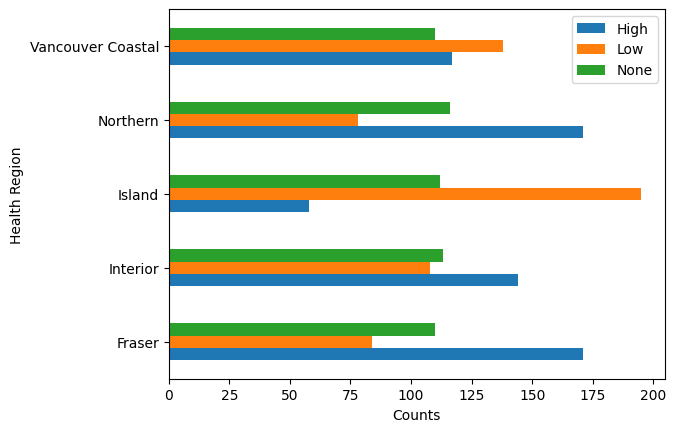

In [12]:
# Your code here
# horizontal bar chart to detail occurrences of each level per region
cases_bin_counts.plot.barh(xlabel = "Counts" , ylabel = "Health Region")

## Question 4

For a single health region of your choice, determine the mean
cases per 100,000 during “High” and “Low” case times.
(recall your `case_bins` DataFrame from the exercise above)

In [13]:
# Your code here
# For the Fraser region, create a df that contains the daily number of cases per 100,000 and their levels
fraser = pd.concat([absolute_cases_bc["Fraser"], cases_bins["Fraser"]], axis=1)
names = ["case", "level"]
fraser.columns = names

# Group by the level and calculate the mean cases per 100,000
fraser.groupby(["level"])["case"].mean().to_frame().rename(columns={"case":"mean_cases"})

,mean_cases
level,
High,25.834644
Low,4.829267
None,0.000000


According to the table above, the mean cases per $100,000$ during `High` case time is $25.834644$, while the mean cases per $100,000$ during `Low` case time is $4.829267$.

Which health regions in our sample performs the best during “bad times" ? To
determine this, compute each health region’s mean daily cases per 100,000 where the daily cases per 100,000 is greater than 10 (i.e., in the "high"
category as defined above).

In [14]:
# Your code here
# Compute each health region’s mean daily cases per 100,000 
# where the daily cases per 100,000 is greater than 10 
bad_time_performance = absolute_cases_bc[cases_bins == "High"].mean().sort_values()
# .to_frame(name="mean_daily_cases_per_100,000").rename_axis("health_region").reset_index()
# add name to the series 
bad_time_performance.name = "mean_daily_cases_per_100k"
# convert to dataframe
bad_time_performance.to_frame()

,mean_daily_cases_per_100k
health_region,
Island,20.921244
Vancouver Coastal,23.868397
Interior,25.332230
Fraser,25.834644
Northern,31.457950


The data above is sorted in ascending order, so the `Island` region in our sample performs the best during "bad time".

# Questions 5-8

Run the following code to load a cleaned piece of census data from Statistics Canada.

In [15]:
df = pd.read_csv("https://datascience.quantecon.org/assets/data/canada_census.csv", header=0, index_col=False)
df.head()

,CDcode,Pname,Population,CollegeEducated,PercentOwnHouse,Income
0,1001,Newfoundland and Labrador,270350,24.8,74.1,74676
1,1002,Newfoundland and Labrador,20370,7.5,86.3,60912
2,1003,Newfoundland and Labrador,15560,7.3,86.0,56224
3,1004,Newfoundland and Labrador,20385,10.9,73.7,44282
4,1005,Newfoundland and Labrador,42015,17.0,73.9,62565


A *census division* is a geographical area, smaller than a Canadian province, that is used to
organize information at a slightly more granular level than by province or by city. The census
divisions are shown below.

![https://datascience.quantecon.org/_static/canada_censusdivisions_map.png](https://datascience.quantecon.org/_static/canada_censusdivisions_map.png)

  
The data above contains information on 1) the population, 2) percent of population with a college
degree, 3) percent of population who own their house/apartment, and 4) the median after-tax income at the
*census division* level.

## Question 5

Run the code below to create a separate data source with province codes and names.

In [16]:
df_provincecodes = pd.DataFrame({
    "Pname" : [ 'Newfoundland and Labrador', 'Prince Edward Island', 'Nova Scotia',
                'New Brunswick', 'Quebec', 'Ontario', 'Manitoba', 'Saskatchewan',
                'Alberta', 'British Columbia', 'Yukon', 'Northwest Territories','Nunavut'],
    "Code" : ['NL', 'PE', 'NS', 'NB', 'QC', 'ON', 'MB', 'SK', 'AB', 'BC', 'YT', 'NT', 'NU']
            })
df_provincecodes

,Pname,Code
0,Newfoundland and Labrador,NL
1,Prince Edward Island,PE
2,Nova Scotia,NS
3,New Brunswick,NB
4,Quebec,QC
5,Ontario,ON
6,Manitoba,MB
7,Saskatchewan,SK
8,Alberta,AB
9,British Columbia,BC


With this,

1. Either merge or join these province codes into the census dataframe to provide province codes for each province
  name. You need to figure out which “key” matches in the merge, and don’t be afraid to rename columns for convenience.  
1. Drop the province names from the resulting dataframe.  
1. Rename the column with the province codes to “Province”.  Hint: `.rename(columns = <YOURDICTIONARY>)`  

In [17]:
combined_df = pd.merge(df, df_provincecodes, on="Pname").drop(columns=["Pname"]).rename(columns={"Code":"Province"})
combined_df.head()

,CDcode,Population,CollegeEducated,PercentOwnHouse,Income,Province
0,1001,270350,24.8,74.1,74676,NL
1,1002,20370,7.5,86.3,60912,NL
2,1003,15560,7.3,86.0,56224,NL
3,1004,20385,10.9,73.7,44282,NL
4,1005,42015,17.0,73.9,62565,NL


## Question 6

Which province has the highest population? Which has the lowest?

In [18]:
# Group by province and population to get total population within province
# then sort it by population in descending order
province_pop = combined_df.groupby("Province")["Population"].sum().to_frame().sort_values(by="Population",ascending=False)

# this is the highest population
province_pop

,Population
Province,
ON,13448490
QC,8164380
BC,4648080
AB,4067160
MB,1278375
SK,1098355
NS,923600
NB,747090
NL,519710


The population in the table above is sorted in descending order, so the Ontario (`ON`) province has the highest population, and the Yukon (`YT`) province has the lowest population.

## Question 7

Which province has the highest *percent of individuals* with a college education? Which has the
lowest?

Hint: Remember to weight this calculation by population!

In [19]:
# Merge these province population into the df2 to provide province population for each row
percent_college_edu = pd.merge(combined_df, province_pop, on="Province").rename(columns={"Population_y":"Province Population", 
                                                                 "Population_x":"Population"})

# Create a new column to store the weighted percentage for each census divisions within its province
percent_college_edu["WeightedPercentage"] = percent_college_edu["Population"]/percent_college_edu["Province Population"]*percent_college_edu["CollegeEducated"]

# Group by the province name and sum up the weighted percentage for each province
percent_college_edu.groupby(["Province"])["WeightedPercentage"].sum().sort_values(ascending=False).to_frame()

,WeightedPercentage
Province,
ON,31.572429
YT,30.100000
BC,29.589973
AB,27.765771
QC,25.361876
NS,25.156071
MB,24.678031
NT,23.814381
PE,23.606620


The percentage in the table above is sorted in descending order, so the Ontario (`ON`) province has the highest percent of individuals with a college education, while the Nunavut (`NU`) province has the lowest percent of individuals with a college education.

## Question 8

By province, what is the *total population* of all census divisions in which more than 80 percent of the population own houses?

In [20]:
# Create a column named ">80 own house" to store the boolean 
df[">80 own house"] = df["PercentOwnHouse"] > 80

# Group data by the new column and add up the population 
# The total population for True is what we want
total_pop_for_house = df.groupby([">80 own house", "Pname"], as_index = False)["Population"].sum()
total_pop_for_house[total_pop_for_house[">80 own house"] == True].rename(columns={"Pname":"Province"})

,>80 own house,Province,Population
13,True,Alberta,122155
14,True,British Columbia,31445
15,True,Manitoba,220595
16,True,New Brunswick,133995
17,True,Newfoundland and Labrador,121425
18,True,Nova Scotia,68585
19,True,Ontario,2915560
20,True,Prince Edward Island,17160
21,True,Quebec,508075
22,True,Saskatchewan,36595


The total population of all census divisions in which more than 80 percent of the population own houses by province is displayed above.